In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy import stats
import scipy as sp

import cmocean as cmo

from ei_net import * 
from utilities import show_values

%matplotlib inline

In [2]:
##########################################
############ PLOTTING SETUP ##############
EI_cmap = "Greys"
where_to_save_pngs = "../figs/pngs/"
where_to_save_pdfs = "../figs/pdfs/"
save = True
plt.rc('axes', axisbelow=True)
plt.rc('axes', linewidth=2)
plt.rc('text', usetex=True)
hfont = {'fontname':'Helvetica'}
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
##########################################
##########################################

# Uncertainty and causal emergence in complex networks

# Chapter 03: Determinism and Degeneracy

Determinism and degeneracy are two properties that exist in every causal structure, and they govern the degree of certainty about the relationships between causes and effects in a system based on the network connectivity. A visual explanation of these two quantities are shown this notebook. Determinism and degeneracy can be arrived at by decomposing the KL Divergence that defines $EI$, but since they are fundamental to the notion of causality, they can also be built up from first principles, as we do here.

Previously we defined an intervention as introducing random walkers on a node in the network, $do_{net}(v_i)$. The amount of uncertainty in the paths of those random walkers is how much information is lost from noise if the random walker is placed on a $v_i$. This is in turn a function of the strength of the output of a node, i.e., the certainty of transitions or dependencies (the determinism of those transition profiles). Therefore we define the determinism using the average entropy of $W^{out}_{i}$ and the degeneracy with the entropy of $W^{in}$ such that:

\begin{align}
    \text{determinism} &= \text{log}_2(N) - \dfrac{1}{N_{out}}\displaystyle \sum_i^{N_{out}} H[W^{out}_{i}] \tag{4}\\\
    \text{degeneracy} &= \text{log}_2(N) - H[W^{in}] \tag{5}
\end{align}

_______________________________

In a maximally deterministic system wherein all nodes have a single output and every entry in $W^{out}_{i}=1.00$, the determinism is just $\text{log}_2(N)$ because their $H[W^{out}_{i}]=0.00$. Conversely, the degeneracy is the amount of information lost via an overlap in input weights (e.g. if multiple nodes output to the same node). The degeneracy is $\text{log}_2(N) - H[W^{in}]$. In a perfectly non-degenerate system wherein all nodes have an equal input weight, the degeneracy is zero because $H[W^{in}] \approx H_{max}$.

These two quantities provide clear explanations for why canonical networks have the $EI$ they do. For example, as the size of an Erdös-Rényi random network increases, its value for degeneracy approaches zero, which means the the $EI$ of a random network is driven only by the determinism of the network. Similarly, in $d$-dimensional ring lattice networks, the degeneracy term is always zero. Therefore, the \textit{EI} of a ring lattice structure reduces to the determinism of that structure. Ring networks with an average degree $\langle k \rangle$ will have a higher $EI$ than ER networks with the same average degree because ring networks will have a higher determinism value. Interestingly, in the case of star networks, the degeneracy term governs the decay of the $EI$ such that hub-and-spoke-like structures quickly become uninformative in terms of cause and effect.

In [17]:
col1 = np.array([0.06581203, 0.49116525, 0.47591044, 1.0])
col2 = np.array([0.68306918, 0.25012518, 0.37634705, 1.0])
col1 = '#5ec07f'
col2 = '#ee8f5f'
col1 = "#008cd0"
col2 = "#e49822"

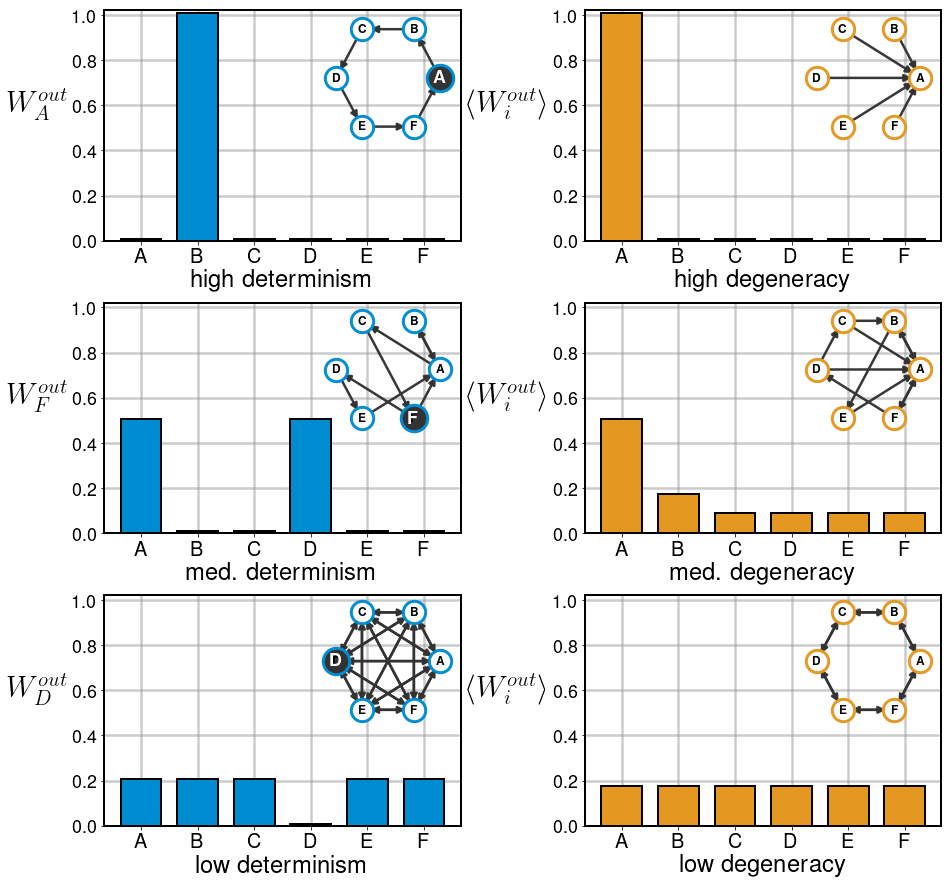

In [18]:
fig, ((ax00, ax01), (ax02, ax03), (ax04, ax05)) = plt.subplots(3, 2, figsize=(15,15))
nodenames = [r'\textbf{A}',r'\textbf{B}',r'\textbf{C}',r'\textbf{D}',r'\textbf{E}',r'\textbf{F}']
N = 6

plt.axes([0.325, 0.755, 0.125, 0.125])
G00 = nx.DiGraph()
G00.add_edges_from([(0,1), (1,2), (2,3), (3,4), (4,5), (5,0)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos00 = nx.circular_layout(G00)
nx.draw_networkx_nodes(G00, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor(col1)
nx.draw_networkx_nodes(G00, pos00, nodelist=[0], node_color='#333333', linewidths=3.0, 
                       node_size=700).set_edgecolor(col1)
nx.draw_networkx_edges(G00, pos00, edge_color="#333333", width=2.5, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G00, pos00, labels=dict(zip([0,1,2,3,4,5], nodenames)))
nx.draw_networkx_labels(G00, pos00, labels=dict(zip([0], [nodenames[0]])), font_color='w',  font_size=18)
ax00.bar(G00.nodes(), W_OUT(G00)[0]+0.009, color=col1, linewidth=2.0, edgecolor='k', width=0.72)
ax00.set_ylim(0.0,1.02)
ax00.set_xticks([0,1,2,3,4,5])
ax00.set_xticklabels(['A','B','C','D','E','F'], fontsize=20)
ax00.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=18)
ax00.set_ylabel(r'$W_{A}^{out}$', fontsize=30, rotation='horizontal', labelpad=35)
ax00.set_xlabel('high determinism', fontsize=24, labelpad=1)
ax00.grid(True, color='#999999', linestyle='-', linewidth=2.5, alpha=0.5)
ax00.set_axisbelow(True)

plt.axes([0.325, 0.485, 0.125, 0.125])
G01 = nx.DiGraph()
G01.add_edges_from([(0,1), (1,0), (0, 2), (3,4), (2,5), (5,0), (5,3), (4, 0)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos01 = nx.circular_layout(G01)
nx.draw_networkx_nodes(G01, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor(col1)
nx.draw_networkx_nodes(G01, pos00, nodelist=[5], node_color='#333333', linewidths=3.0, 
                       node_size=700).set_edgecolor(col1)
nx.draw_networkx_edges(G01, pos00, edge_color="#333333", width=2.5, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G01, pos00, labels=dict(zip([0,1,2,3,4,5], nodenames)))
nx.draw_networkx_labels(G01, pos00, labels=dict(zip([5], [nodenames[5]])), font_color='w', font_size=18)
ax02.bar(G01.nodes(), W_OUT(G01)[5]+0.008, color=col1, linewidth=2.0, edgecolor='k', width=0.72)
ax02.set_ylim(0.0,1.02)
ax02.set_xticks([0,1,2,3,4,5])
ax02.set_xticklabels(['A','B','C','D','E','F'], fontsize=20)
ax02.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=18)
ax02.set_ylabel(r'$W_{F}^{out}$', fontsize=30, rotation='horizontal', labelpad=35)
ax02.set_xlabel('med. determinism', fontsize=24, labelpad=1)
ax02.grid(True, color='#999999', linestyle='-', linewidth=2.5, alpha=0.5)
ax02.set_axisbelow(True)

plt.axes([0.325, 0.215, 0.125, 0.125])
G02 = nx.complete_graph(N)
G02 = nx.to_directed(G02)
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos02 = nx.circular_layout(G02)
nx.draw_networkx_nodes(G02, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor(col1)
nx.draw_networkx_nodes(G02, pos00, nodelist=[3], node_color='#333333', linewidths=3.0, 
                       node_size=700).set_edgecolor(col1)
nx.draw_networkx_edges(G02, pos00, edge_color="#333333", width=2.5, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G02, pos00, labels=dict(zip([0,1,2,3,4,5], nodenames)))
nx.draw_networkx_labels(G02, pos00, labels=dict(zip([3], [nodenames[3]])), font_color='w', font_size=18)
ax04.bar(G02.nodes(), W_OUT(G02)[3]+0.008, color=col1, linewidth=2.0, edgecolor='k', width=0.72)
ax04.set_ylim(0.0,1.02)
ax04.set_xticks([0,1,2,3,4,5])
ax04.set_xticklabels(['A','B','C','D','E','F'], fontsize=20)
ax04.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=18)
ax04.set_ylabel(r'$W_{D}^{out}$', fontsize=30, rotation='horizontal', labelpad=35)
ax04.set_xlabel('low determinism', fontsize=24, labelpad=1)
ax04.grid(True, color='#999999', linestyle='-', linewidth=2.5, alpha=0.5)
ax04.set_axisbelow(True)

plt.axes([0.77, 0.755, 0.125, 0.125])
G11 = nx.DiGraph()
G11.add_edges_from([(1,0), (2,0), (3,0), (4,0), (5,0)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos11 = nx.circular_layout(G11)
nx.draw_networkx_nodes(G11, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor(col2)
nx.draw_networkx_edges(G11, pos00, edge_color="#333333", width=2.5, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G11, pos00, labels=dict(zip([0,1,2,3,4,5], nodenames)), font_weight='bold')
ax01.bar(G11.nodes(), W_IN(G11)+0.008, color=col2, linewidth=2.0, edgecolor='k', width=0.72)
ax01.set_ylim(0.0,1.02)
ax01.set_xticks([0,1,2,3,4,5])
ax01.set_xticklabels(['A','B','C','D','E','F'], fontsize=20)
ax01.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=18)
ax01.set_ylabel(r'$\langle W_{i}^{out} \rangle$', fontsize=30, rotation='horizontal', labelpad=44)
ax01.set_xlabel('high degeneracy', fontsize=24, labelpad=1)
ax01.grid(True, color='#999999', linestyle='-', linewidth=2.5, alpha=0.5)
ax01.set_axisbelow(True)

plt.axes([0.77, 0.485, 0.125, 0.125])
G12 = nx.watts_strogatz_graph(6, 2, 0)
G12 = nx.DiGraph()
G12.add_edges_from([(1,0), (3,0), (4,0), (2,0), (1,4), (3,2), (5,3), (0,1), (5,0), (0,5), (2,1)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos12 = nx.circular_layout(G12)
nx.draw_networkx_nodes(G12, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor(col2)
nx.draw_networkx_edges(G12, pos00, edge_color="#333333", width=2.5, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G12, pos00, labels=dict(zip([0,1,2,3,4,5], nodenames)), font_weight='bold')
ax03.bar(G12.nodes(), W_IN(G12)+0.008, color=col2, linewidth=2.0, edgecolor='k', width=0.72)
ax03.set_ylim(0.0,1.02)
ax03.set_xticks([0,1,2,3,4,5])
ax03.set_xticklabels(['A','B','C','D','E','F'], fontsize=20)
ax03.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=18)
ax03.set_ylabel(r'$\langle W_{i}^{out} \rangle$', fontsize=30, rotation='horizontal', labelpad=44)
ax03.set_xlabel('med. degeneracy', fontsize=24, labelpad=1)
ax03.grid(True, color='#999999', linestyle='-', linewidth=2.5, alpha=0.5)
ax03.set_axisbelow(True)

plt.axes([0.77, 0.215, 0.125, 0.125])
G13 = nx.DiGraph()
G13.add_edges_from([(0,1), (1,2), (2,3), (3,4), (4,5), (5,0), (1,0), (2,1), (3,2), (4,3), (5,4), (0,5)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos13 = nx.circular_layout(G13)
nx.draw_networkx_nodes(G13, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor(col2)
nx.draw_networkx_edges(G13, pos00, edge_color="#333333", width=2.5, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G13, pos00, labels=dict(zip([0,1,2,3,4,5], nodenames)), font_weight='bold')
ax05.bar(G13.nodes(), W_IN(G13)+0.008, color=col2, linewidth=2.0, edgecolor='k', width=0.72)
ax05.set_ylim(0.0,1.02)
ax05.set_xticks([0,1,2,3,4,5])
ax05.set_xticklabels(['A','B','C','D','E','F'], fontsize=20)
ax05.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=18)
ax05.set_ylabel(r'$\langle W_{i}^{out} \rangle$', fontsize=30, rotation='horizontal', labelpad=44)
ax05.set_xlabel('low degeneracy', fontsize=24, labelpad=1)
ax05.grid(True, color='#999999', linestyle='-', linewidth=2.5, alpha=0.5)
ax05.set_axisbelow(True)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.27)

if save:
    plt.savefig(where_to_save_pngs+"EffectiveInformation_DetermDegen_WoutWin.png", bbox_inches='tight', dpi=425)
    plt.savefig(where_to_save_pdfs+"EffectiveInformation_DetermDegen_WoutWin.pdf", bbox_inches='tight')

plt.show()

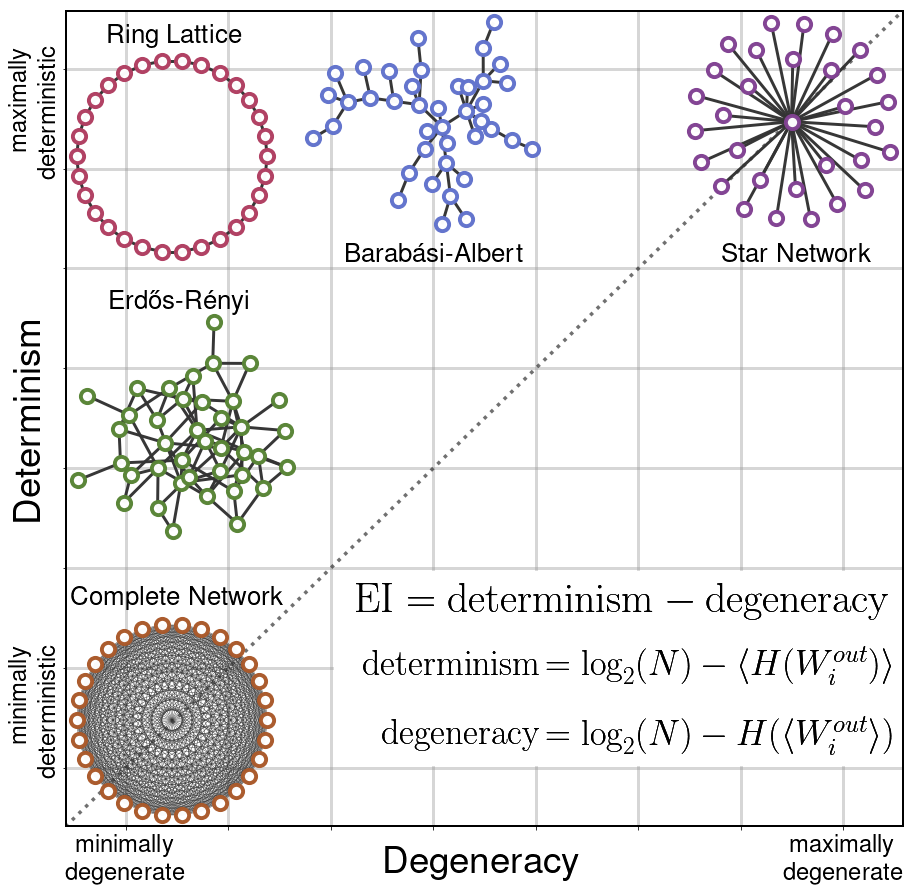

In [22]:
fig, ax = plt.subplots(figsize=(15,15))

plt.plot([-0.5, 10.5], [-0.5, 10.5], marker='', linestyle=':', linewidth=3.5, 
         color='#333333', label='Y=X', alpha=0.7)

plt.plot([np.linspace(-0.2,1.2,num=10)[3]+0.0075,np.linspace(-0.2,1.2,num=10)[9]],
         [np.linspace(-0.2,1.2,num=10)[2]]*2,color='w',linewidth=5.3)
plt.plot([np.linspace(-0.2,1.2,num=10)[4]]*2,
         [np.linspace(-0.2,1.2,num=10)[1]+0.0075,np.linspace(-0.2,1.2,num=10)[3]-0.0075],
         color='w',linewidth=5.3)
plt.plot([np.linspace(-0.2,1.2,num=10)[5]]*2,
         [np.linspace(-0.2,1.2,num=10)[1]+0.0075,np.linspace(-0.2,1.2,num=10)[3]-0.0075],
         color='w',linewidth=5.3)
plt.plot([np.linspace(-0.2,1.2,num=10)[6]]*2,
         [np.linspace(-0.2,1.2,num=10)[1]+0.0075,np.linspace(-0.2,1.2,num=10)[3]-0.0075],
         color='w',linewidth=5.3)
plt.plot([np.linspace(-0.2,1.2,num=10)[7]]*2,
         [np.linspace(-0.2,1.2,num=10)[1]+0.0075,np.linspace(-0.2,1.2,num=10)[3]-0.0075],
         color='w',linewidth=5.3)
plt.plot([np.linspace(-0.2,1.2,num=10)[8]]*2,
         [np.linspace(-0.2,1.2,num=10)[1]+0.0075,np.linspace(-0.2,1.2,num=10)[3]-0.0075],
         color='w',linewidth=5.3)

ns = 175
cols = ["#c77739","#9765ca","#40a0e2","#c95980","#01bb96"]
cols = ["#927134","#9765ca","#40a0e2","#c95980","#01bb96"]
cols = ["#666666","#666666","#666666","#666666","#666666"]
cols = ["#b03e61","#aa592a","#588435","#6172cc","#814192"]
plt.axes([0.123, 0.645, 0.20, 0.20])
G10 = nx.watts_strogatz_graph(30, 2, 0.0)
plt.axis('off')
pos10 = nx.circular_layout(G10)
nx.draw_networkx_nodes(G10, pos10, node_color='white', node_size=ns, 
                       linewidths=3.9, alpha=0.98).set_edgecolor(cols[0])
nx.draw_networkx_edges(G10, pos10, edge_color="#333333", width=2.95, alpha=0.98)
ax.text(-.072, 1.085, "Ring Lattice", ha='left', rotation=0, wrap=True, size=26)

plt.axes([0.123, 0.123, 0.20, 0.20])
G11 = nx.complete_graph(30)
plt.axis('off')
pos11 = nx.circular_layout(G11)
nx.draw_networkx_nodes(G11, pos11, node_color='white', node_size=ns, 
                       linewidths=3.9, alpha=0.98).set_edgecolor(cols[1])
nx.draw_networkx_edges(G11, pos11, edge_color="#333333", width=0.45, alpha=0.98)
ax.text(-.128, 0.21, "Complete Network", ha='left', rotation=0, wrap=True, size=26)

plt.axes([0.123, 0.385, 0.22, 0.22])
G12 = nx.erdos_renyi_graph(40, .09)
plt.axis('off')
pos12 = nx.kamada_kawai_layout(G12)
nx.draw_networkx_nodes(G12, pos12, node_color='white', node_size=ns, 
                       linewidths=3.9, alpha=0.98).set_edgecolor(cols[2])
nx.draw_networkx_edges(G12, pos12, edge_color="#333333", width=2.95, alpha=0.98)
ax.text(-.069, 0.67, "Erdős-Rényi", ha='left', rotation=0, wrap=True, size=26)

plt.axes([0.340, 0.668, 0.23, 0.215])
G13 = nx.barabasi_albert_graph(40, 1)
plt.axis('off')
pos13 = nx.kamada_kawai_layout(G13)
nx.draw_networkx_nodes(G13, pos13, node_color='white', node_size=ns, 
                       linewidths=3.9, alpha=0.98).set_edgecolor(cols[3])
nx.draw_networkx_edges(G13, pos13, edge_color="#333333", width=2.95, alpha=0.98)
ax.text(0.29, 0.745, "Barabási-Albert", ha='left', rotation=0, wrap=True, size=26)

plt.axes([0.695, 0.675, 0.205, 0.205])
G14 = nx.star_graph(30)
plt.axis('off')
pos14 = nx.spring_layout(G14)
nx.draw_networkx_nodes(G14, pos14, node_color='white', node_size=ns, 
                       linewidths=3.9, alpha=0.98).set_edgecolor(cols[4])
nx.draw_networkx_edges(G14, pos14, edge_color="#333333", width=2.95, alpha=0.98)
ax.text(0.86, 0.745, "Star Network", ha='left', rotation=0, wrap=True, size=26)

plt.axes([0.1, 0.1, 0.2, 0.2])
plt.axis('off')
string10 = r'$\rm EI = determinism - degeneracy$'
string21 = r'$\rm determinism$'
string22 = r'$= \log_2(N) - ' r'\langle H(W_i^{out}) \rangle$'
string31 = r'$\rm degeneracy$'
string32 = r'$\hspace{0.6cm}= \log_2(N) - ' r'H(\langle W_{i}^{out} \rangle)$'

ax.text(0.305, 0.1980, string10, ha='left', rotation=0, wrap=True, size=42)
ax.text(0.315, 0.1010, string21, ha='left', rotation=0, wrap=True, size=36)
ax.text(0.593, 0.0850, string22, ha='left', rotation=0, wrap=True, size=36)
ax.text(0.345, -.0070, string31, ha='left', rotation=0, wrap=True, size=36)
ax.text(0.593, -.0240, string32, ha='left', rotation=0, wrap=True, size=36)
ax.text(0.305, 0.1980, string10, ha='left', rotation=0, wrap=True, size=42)
ax.text(0.315, 0.1010, string21, ha='left', rotation=0, wrap=True, size=36)
ax.text(0.593, 0.0850, string22, ha='left', rotation=0, wrap=True, size=36)
ax.text(0.345, -.0070, string31, ha='left', rotation=0, wrap=True, size=36)
ax.text(0.593, -.0240, string32, ha='left', rotation=0, wrap=True, size=36)

ax.grid(True, linestyle='-', color='#999999', linewidth=3.0, alpha=0.4)
ax.set_xlabel("Degeneracy", size=37, labelpad=-40)
ax.set_ylabel("Determinism", size=37, labelpad=-40)
ax.set_xticklabels(labels=['','minimally\n degenerate','', '',  '','', '','', 'maximally\n degenerate',''],
                   size=24)
ax.set_xticks(ticks=np.linspace(-0.2,1.2,num=10))
ax.set_yticklabels(labels=['','','minimally  \n deterministic  ','', '', '', 
                           '',  '','   maximally\n   deterministic'], 
                   size=24, rotation='vertical')
ax.set_yticks(ticks=np.linspace(-0.2,1.2,num=10))
ax.set_xlim(-0.135,1.135)
ax.set_ylim(-0.135,1.135)

if save:
    plt.savefig(where_to_save_pngs+"EffectiveInformation_DetermDegen_Canonical.png", bbox_inches='tight', dpi=425)
    plt.savefig(where_to_save_pdfs+"EffectiveInformation_DetermDegen_Canonical.pdf", bbox_inches='tight')

plt.show()

___________________________